In [ ]:
%pip install numpy

In [ ]:
# ALL IMPORTS HERE 
import numpy as np


This file contains one layer neural network which demonstrates detection of cat .

For starters we will need to define few things , 
we need a  neural net which has forward propoagtion and backward propogation , dataset of images of cat and non cat , fucntion to train and test 

Defining a neural net , we will need few things , 
for forward propogation we need a simple function for linear transformation z= w.Tx+b , activation function a = sig(z)  , cost function = binary entropy
for backward propogatoin we need  diff of above to so that we could update our wts and biases 

# DEFINING FUNCTIONS

In [134]:
# Defining z function

def calc_z(w,x,b):
    return np.dot(w.T,x) + b

# Defining activation function ( here sigmoid )

def sig(z):
    return 1 / (1 + np.exp(-z))

# Defining cost function (here binary entropy )

def calc_loss(y,y_hat):
    # THIS FUNCTION IS BCE (BINARY CROSS ENTROY ) 
    # the main idea behind this function is to penalize 
    # large differences between the actual vs derivde value

    eps=1e-12 # 10^(-12) a small constant to avoid 0 inside log value
    return - np.mean( y* np.log(y_hat + eps) + (1-y) * np.log(1-y_hat+ eps))

# Calculating forward propogatin

def forward_prop (w,x,b):
    z= calc_z(w,x,b)
    a= sig(z)
    return a

def backward_prop(w,x,b,y_hat,y):
    output_diff=y_hat-y
    # w: (2,1) , x: (2,1)
    return (output_diff*x).T , output_diff

def train(w,x,b,y,learning_rate):
    y_hat = forward_prop(w,x,b)
    loss = calc_loss(y,y_hat)
    dw , db = backward_prop(w,x,b,y_hat,y)
    w= w - learning_rate*dw
    b= b - learning_rate*db
    return w ,b,loss

def test(w,x,b):
    return 1 if forward_prop(w,x,b) > 0.5 else 0

Now we need a dataset we will use half plane function to generate x and y

In [135]:

def generate_halfplane_dataset(n_samples=500, seed=42):
    np.random.seed(seed)
    
    # Random points in range [-5, 5]
    X = np.random.uniform(-5, 5, (2, n_samples))
    
    # Labels: 1 if x1 + x2 > 0 else 0
    y = (X[0] + X[1] > 0).astype(int).reshape(1, -1)
    
    return X, y

In [136]:
def train_test_split(X, y, test_size=0.2, seed=42):
    """
    Split X (2,n) and y (1,n) into train and test sets.
    Args:
        X        : np.ndarray (2, n)
        y        : np.ndarray (1, n)
        test_size: fraction of data to reserve for testing (default 0.2 = 20%)
        seed     : random seed for reproducibility

    Returns:
        X_train, y_train, X_test, y_test
    """
    rng = np.random.default_rng(seed)
    n = X.shape[1]
    idx = np.arange(n)
    rng.shuffle(idx)

    split = int(n * (1 - test_size))
    train_idx, test_idx = idx[:split], idx[split:]

    X_train, X_test = X[:, train_idx], X[:, test_idx]
    y_train, y_test = y[:, train_idx], y[:, test_idx]

    return X_train, y_train, X_test, y_test


In [151]:

def generate_circle_band_dataset(n_points=500, inner_radius=0.7, outer_radius=1.2, seed=42):
    """
    Generate dataset of points (x1, x2) labeled 1 if they lie within a circular ring (inner_radius < r < outer_radius),
    else labeled 0.
    
    Returns:
        X: shape (2, n_points) — feature matrix
        y: shape (1, n_points) — labels
    """
    rng = np.random.default_rng(seed)
    
    X = rng.uniform(low=-1.5*outer_radius, high=1.5*outer_radius, size=(2, n_points))  # shape (2, n_points)
    r = np.sqrt(X[0]**2 + X[1]**2)
    y = ((r > inner_radius) & (r < outer_radius)).astype(int).reshape(1, -1)
    
    return X, y


In [157]:
# Generate dataset
X, y = generate_halfplane_dataset(500,seed=42)
# you will fail to solve for below function and won't be able to make the loss go down becauses its isn't linearly seperable 
# X, y = generate_circle_band_dataset(500)

# Split into train/test (80/20)
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, seed=42)

print("Train shapes:", X_train.shape, y_train.shape)  # (2, 400), (1, 400)
print("Test shapes:",  X_test.shape,  y_test.shape)   # (2, 100), (1, 100)


Train shapes: (2, 400) (1, 400)
Test shapes: (2, 100) (1, 100)


NOW SINCE WE HAVE ALL THE FUNCTIONS DEFINED LETS START WITH DOING TRAIN AND TESTS , FOR STARTERS LETS START WITH SOME SIMPLE FUNCTIONS

In [159]:
np.random.seed(42)

W = np.random.rand(2,1)
B = np.random.rand(1,1)

# lets iterate for each example and test our forward prop 
for j in range(1,1000):
    for i in range(X_train.shape[1]):
        # print(f'training on {i+1}th example ') 
        W,B,loss= train(W,X_train[:,i],B,y_train[:,i],learning_rate=0.001)
    print(f"epoch {j+1}  loss: {loss} ")

print(f"updated paramaters W : {W} , b: {B}")



epoch 2  loss: 0.3971419551856199 
epoch 3  loss: 0.26426930417699895 
epoch 4  loss: 0.203198157947683 
epoch 5  loss: 0.1715905046401225 
epoch 6  loss: 0.15345129291555432 
epoch 7  loss: 0.14207062152760724 
epoch 8  loss: 0.1343360682994365 
epoch 9  loss: 0.1286842324246435 
epoch 10  loss: 0.12428132958566315 
epoch 11  loss: 0.12066201199962459 
epoch 12  loss: 0.11755695381810906 
epoch 13  loss: 0.11480529961613418 
epoch 14  loss: 0.11230808310372979 
epoch 15  loss: 0.11000255583136394 
epoch 16  loss: 0.10784764914033568 
epoch 17  loss: 0.10581555763515023 
epoch 18  loss: 0.10388677336940691 
epoch 19  loss: 0.10204710444283448 
epoch 20  loss: 0.10028585414174361 
epoch 21  loss: 0.09859468905368343 
epoch 22  loss: 0.09696692202908344 
epoch 23  loss: 0.09539704846765347 
epoch 24  loss: 0.09388043956821485 
epoch 25  loss: 0.09241313436429598 
epoch 26  loss: 0.09099169499818772 
epoch 27  loss: 0.08961310324211112 
epoch 28  loss: 0.08827468447998427 
epoch 29  loss:

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend entry

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

def plot_decision_boundary(W, B, X, y, scale=1.0, title="Decision Boundary"):
    # Ensure correct shapes
    W = np.asarray(W).reshape(2, 1)         # (2,1)
    B = np.asarray(B).reshape(1, 1)         # (1,1)
    X = np.asarray(X)                       # (2,N)
    y = np.asarray(y).reshape(-1)           # (N,)

    # Create a grid over the input space
    x1, x2 = X[0], X[1]
    m1, M1 = x1.min() - 0.5, x1.max() + 0.5
    m2, M2 = x2.min() - 0.5, x2.max() + 0.5
    gx = np.linspace(m1, M1, 400)
    gy = np.linspace(m2, M2, 400)
    GX, GY = np.meshgrid(gx, gy)

    # Evaluate model over the grid
    Gflat = np.vstack([GX.ravel(), GY.ravel()]) / scale   # (2, N)
    Z = np.dot(W.T, Gflat) + B                            # (1, N)
    P = sigmoid(Z).reshape(GX.shape)                      # reshape to grid

    # Plot the decision boundary and data
    plt.figure(figsize=(6, 6))
    plt.contourf(GX, GY, P >= 0.5, levels=1, alpha=0.15, colors=["#FFAAAA", "#AAAAFF"])
    contour = plt.contour(GX, GY, P, levels=[0.5], colors='k', linewidths=1)

    # Plot data points
    plt.scatter(x1[y == 0], x2[y == 0], s=15, label="Class 0", color="red", edgecolors="k")
    plt.scatter(x1[y == 1], x2[y == 1], s=15, label="Class 1", color="blue", edgecolors="k")

    # Manual legend entry for decision boundary
    boundary_patch = Line2D([0], [0], color='black', linestyle='-', label='Decision Boundary (p=0.5)')
    plt.legend(handles=[boundary_patch], loc="upper right")

    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


In [161]:
print(B.shape)

(1, 1)


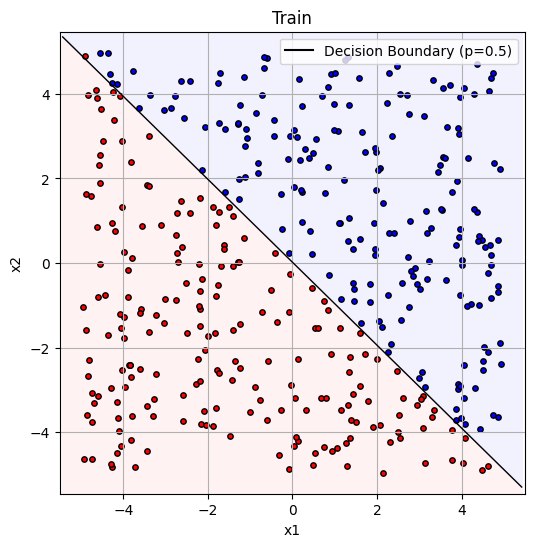

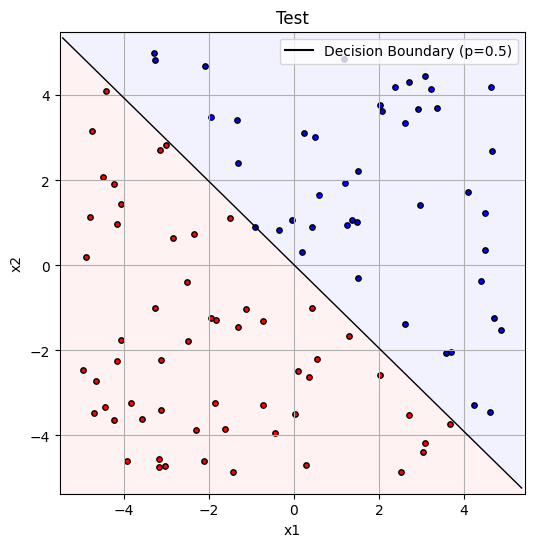

In [162]:
plot_decision_boundary(W, B, X_train, y_train,title="Train")
plot_decision_boundary(W, B, X_test,  y_test,title="Test")